# Soft Support Vector Machine

Este notebook irá demonstrar a implementação de um Soft-SVM usando SGD (Stochastic Gradient Descent) como método de otimização.

## Hard-SVM
Fonte: Understanding Machine Learning

O SVM busca um hiperplano que separe as duas categorias. Esse hiperplano é definido por um vetor normal a sua superfície, $\vec{w}$, e uma distância $b$ da origem. 

Existe uma noção de uma distância "assinada", $\langle\vec{w}, x_i\rangle + b$. Em módulo, essa função é a distância de um ponto $x_i$ ao o hiperplano. Porém, em um lado admite valores positivos, e do outro, valores negativos. Assim, se chamarmos cada categoria de um ponto $x_i$ de $y_i \in \{\pm 1\}$. Caso seja possível separar todos os pontos por um hiperplano (o que chama de linearmente separável), teremos que $y_i(\langle\vec{w}, x_i\rangle+b) > 0$ para todo $i$. O caso linearmente separável é chamado de Hard-SVM.

A margem é a distância do hiperplano ao ponto mais próximo a ele. Como a distância entre um ponto qualquer $x_i$ do dataset e o hiperplano é dado por $|\langle\vec{w}, x_i\rangle+b|$, a margem será $\underset{i}{\min} |\langle\vec{w}, x_i\rangle+b|$. Buscamos então encontrar um $\vec{w}$ que *maximize* a margem entre cada categoria ($y_i$), ou seja $\underset{(\vec{w},b),||\vec{w}||=1}{\arg\max} \left| \underset{i}{\min} \langle\vec{w}, x_i\rangle+b \right|$, com a restrição de que $y_i(\langle\vec{w}, x_i\rangle+b) > 0$ $\forall i$.

Resolver a equação anterior é o mesmo que resolver a equação $\underset{(\vec{w},b),||\vec{w}||=1}{\arg\max} \underset{i}{\min} y_i(\langle\vec{w}, x_i\rangle+b)$, pois os termos com $\min$ são equivalentes para um hiperplano que separe as duas categorias.

Vamos supor que $(\vec{w}^\star, b^\star)$ seja o hiperplano desejado, que resolva a equação acima. Então $\gamma^\star = \underset{i}{\min} y_i(\langle\vec{w}, x_i\rangle+b)$ será a margem do hiperplano. Logo, para todo $i$, temos $y_i(\langle\vec{w}^\star, x_i\rangle+b^\star) \geq \gamma^\star$, ou equivalentemente $y_i(\langle \frac{\vec{w}^\star}{\gamma^\star}, x_i\rangle+\frac{b^\star}{\gamma^\star}) \geq 1$.

Defina $(\vec{w}_0, b_0) = \underset{(\vec{w}, b)}{\arg\min} ||\vec{w}||^2$ tal que $\forall i$ $y_i(\langle\vec{w}, x_i\rangle+b) \geq 1$ (o quadrado é para ser diferenciável e convexo). Claramente $\left( \frac{\vec{w}^\star}{\gamma^\star}, \frac{b^\star}{\gamma^\star} \right)$ satisfaz a parte do "tal que", e portanto $||\vec{w}_0|| \leq ||\frac{\vec{w}^\star}{\gamma^\star}|| = \frac{1}{\gamma^\star}$.

Portanto, para todo $i$, temos $y_i\left(\left\langle \frac{\vec{w}_0}{||\vec{w}_0||}, x_i\right\rangle+\frac{b_0}{||\vec{w}_0||}\right) = \frac{1}{||\vec{w}_0||}y_i\left(\left\langle \vec{w}_0, x_i\right\rangle+b_0\right) \geq \frac{1}{||\vec{w}_0||} \geq \gamma^\star$. Ou seja, $(\frac{\vec{w}_0}{||\vec{w}_0||}, \frac{b_0}{||\vec{w}_0||})$ é uma solução do Hard-SVM.

Temos portanto o algoritmo do Hard-SVM:
> Encontre $(\vec{w}_0, b_0) = \underset{(\vec{w}, b)}{\arg\min} ||\vec{w}||^2$ tal que $\forall i$ $y_i(\langle\vec{w}, x_i\rangle+b) \geq 1$.

> Retorne $\left(\frac{\vec{w}_0}{||\vec{w}_0||}, \frac{b_0}{||\vec{w}_0||}\right)$.

## Soft-SVM

O algoritmo anterior exigia que o dataset fosse linearmente separável, e isso implicava na restrição $\forall i$ $y_i(\langle\vec{w}, x_i\rangle+b) \geq 1$.

Podemos porém permitir violar "um pouco" essa condição dizendo que $\forall i$ $y_i(\langle\vec{w}, x_i\rangle+b) \geq 1-\epsilon_i$, onde $\epsilon_i$ será um erro da margem. Naturalmente vamos querer minimizar esse erro, e então somamos a média dos $\epsilon_i$ na minimização. Assim, o novo algoritmo é:

> Encontre $(\vec{w}, b) = \underset{(\vec{w}, b)}{\arg\min} \left[ \frac{\lambda}{2}||\vec{w}||^2 + \frac{1}{|[i]|}\sum_i \epsilon_i \right]$ tal que $\forall i$ $y_i(\langle\vec{w}, x_i\rangle+b) \geq 1 -\epsilon_i$.

> Retorne $(\vec{w}, b)$.

Os termos de normalização foram absorvidos pelo $\frac{\lambda}{2}$.

Mas como calcular essas minimizações? Neste caso será usado o SGD. Primeiro, notamos que $\epsilon_i = \max \{0, 1-y_i(\langle \vec{w},x_i \rangle+b) \}$. A derivada de $\epsilon$ é $-yx$ ou zero, a depender do máximo. Chamaremos $\partial(\max \{0, 1-y_i(\langle \vec{w},x_i \rangle+b) \})$ de $v$.

Vamos então começar com um vetor nulo $\vec{w}^{(0)} = \vec{0}$, e um $\eta = \frac{1}{\lambda t}$. É possível mostrar (confia) que a regra de atualização:

$$ \vec{w}^{(t+1)} = \vec{w}^{(t)} - \eta \nabla\left[ \frac{\lambda}{2}||\vec{w}^{(t)}||^2 + \frac{1}{|[i]|}\sum_i \epsilon_i \right]$$
$$ = \vec{w}^{(t)} - \frac{1}{\lambda t} \left[ \lambda\vec{w}^{(t)} + v_t \right]$$
É igual a:
$$ \vec{w}^{(t+1)} = \frac{1}{\lambda t} \sum_i v_i = \frac{1}{\lambda t} \theta^{(t)}$$
Onde $\theta$ é a soma das derivadas de $\epsilon$, $v_i$

## Implementando

Começamos importando as bibliotecas básicas, numpy (para cálculos matemáticos), matplotlib (para plotagem) e scikit learn (apenas para gerar um dataset).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from random import randrange

## Gerar dataset:
- 100 pontos
- 2 classes

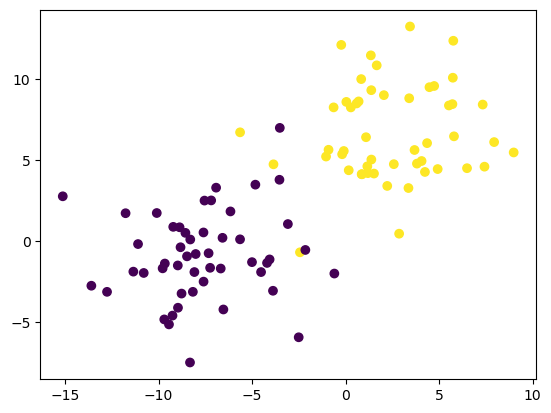

In [18]:
data = make_blobs(centers=2, cluster_std=3)
m = len(data[1]) # número de pontos
x = data[0]
y = data[1]
y = 2*y-1
plt.scatter(x[:,0], x[:,1], c=y)

## Implementar algoritmo de treinamento


In [19]:
T = 10000 # número de passos do SGD
w = np.zeros((T, 2+1))  # cada "fatia" dessa matriz será o t-ésimo vetor w;
                        # o número "b" foi incorporado ao w
theta = np.zeros((T, 2+1))
lambd = 1

In [20]:
for t in range(T-1):
    w[t] = (1/lambd*(t+1)) * theta[t]
    i = randrange(m)
    x_ = np.append(x[i], 1) # para incorporar o "b" ao produto escalar
    if y[i] * np.dot(w[t], x_) < 1:
        theta[t+1] = theta[t] + y[i]*x_
    else:
        theta[t+1] = theta[t]

In [21]:
wbar = np.zeros(2+1)
for t in range(T):
    wbar += w[t]
wbar *= 1/T

## Plotar

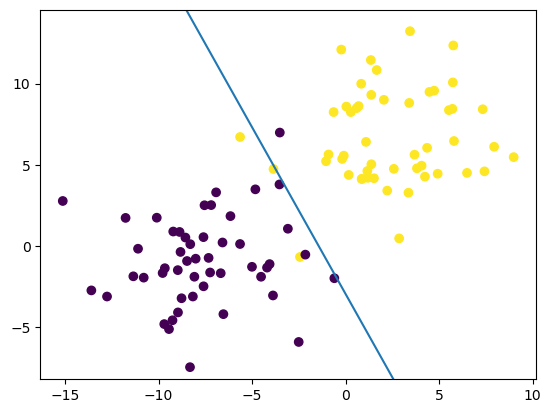

In [41]:
#machine_label = [np.sign(np.dot(wbar, np.append(xi, 1))) for xi in x]
#plt.scatter(x[:,0], x[:,1], c=machine_label)
plt.scatter(x[:,0], x[:,1], c=y)

X = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
Y = [(-wbar[0]*x_- wbar[2])/wbar[1] for x_ in X]
plt.ylim([1.1*np.min(x[:,1]), 1.1*np.max(x[:,1])])
plt.plot(X, Y)